# Activity 5.01: Reading Tabular Data from a Web Page and Creating DataFrames 

In [21]:
#I am using the downloaded html from the latest url. So the code would also be a little bit different from the book.
#Reading the page using bs4 and doing a pretty output

from bs4 import BeautifulSoup
import pandas as pd

with open ("C:\\Users\\Riaz\\Downloads\\List of countries by GDP (nominal) - Wikipedia.html",'r',encoding = "utf-8") as fd:
    page=BeautifulSoup(fd)

print("The pretty output of the html page\n","-"*40,"\n",page.prettify())


    

The pretty output of the html page
 ---------------------------------------- 
 <!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by GDP (nominal) - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-featur

In [22]:
#Finding the number of tables
tables=page.find_all("table")
print("The number of tables in the page are {}".format(len(tables)),'\n\n')

#Finding the right table.  The tables returned the result set, a form of list.  By using the indexing, 
#I was able to find the right table.  Also, I was able to get that by using the attributes and mentioning the class name

table_to_be_used = page.find_all("table",attrs={'class': 'wikitable sortable sticky-header-multi static-row-numbers'})

print(table_to_be_used)

data_table=tables[2]
print("Data table is\n\n",data_table)





The number of tables in the page are 7 


[<table class="wikitable sortable sticky-header-multi static-row-numbers" style="text-align:right;">
<caption>GDP (USD Million) by country
</caption>
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country/Territory
</th>
<th rowspan="2"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN region</a>
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_2-2"><a href="#cite_note-GDP_IMF-2">[1]</a></sup><sup class="reference" id="cite_ref-15"><a href="#cite_note-15">[13]</a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[14]</a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Nations</a><sup class="reference" id="cite_ref-UN_17

In [23]:
#Separating the source names and their corresponding data.

sources=data_table.tbody.find_all('tr')[0]
print(sources,"\n\n")

year_sources=data_table.tbody.find_all('tr')[1]
year_sources = [th.getText().strip() for th in year_sources.find_all('th')][1::2]

#Extracting the header,

header1=[i.getText().strip() for i in sources.find_all('th',attrs={'rowspan': '2'})] + [l.a.getText() for l in sources.find_all('th',attrs={'colspan': '2'})]

indexes = [3,5,7]

for index, element in zip(indexes, year_sources):
    header1.insert(index, element)

#Printing the final header
    
print("The final header is\n",header1)


<tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country/Territory
</th>
<th rowspan="2"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN region</a>
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_2-2"><a href="#cite_note-GDP_IMF-2">[1]</a></sup><sup class="reference" id="cite_ref-15"><a href="#cite_note-15">[13]</a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[14]</a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Nations</a><sup class="reference" id="cite_ref-UN_17-0"><a href="#cite_note-UN-17">[15]</a></sup>
</th></tr> 


The final header is
 ['Country/Territory', 'UN region', 'IMF', 'Year', 'World Bank', 'Year', 'United Nations', 'Year']


In [24]:
#Extracting the rows

rows1=data_table.find_all('tr')[2:]

data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
    
#Loading the extracted data and passing on the header names as columns
    
usdbymillion = pd.DataFrame(data_rows1,columns=header1)

#Inspecting the dataframe and also printing its shape

print("The head output of the dataframe\n\n",usdbymillion.head(),'\n\n')

print("The shape of the created dataframe is ",usdbymillion.shape)



The head output of the dataframe

   Country/Territory UN region          IMF       Year   World Bank       Year  \
0             World         —  104,476,432       2023  100,562,011       2022   
1     United States  Americas   26,949,643       2023   25,462,700       2022   
2             China      Asia   17,700,899  2023[n 1]   17,963,171  2022[n 3]   
3           Germany    Europe    4,429,838       2023    4,072,192       2022   
4             Japan      Asia    4,230,862       2023    4,231,141       2022   

  United Nations       Year  
0     96,698,005       2021  
1     23,315,081       2021  
2     17,734,131  2021[n 1]  
3      4,259,935       2021  
4      4,940,878       2021   


The shape of the created dataframe is  (213, 8)


# Activity 6.01: Handling Outliers and Missing Data

In [25]:
#Reading the csv data to panda dataframe by using builtin functions,

visitdata=pd.read_csv("C:\\Users\\Riaz\\downloads\\visit_data.csv")

#Doing the head on the dataframe to quickly view

visitdata.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [26]:
#Checking if there are duplicates in the first and last name

print("Duplicated status of first name\n",visitdata['first_name'].duplicated().any())
print("Duplicated status of last name\n",visitdata['last_name'].duplicated().any())
print("Duplicated status of email\n",visitdata['email'].duplicated().any(),"\n\n")

#As per the below status, we can find duplicates in first and last name.  There are no duplicates in email ids.

print("The status of if any columns are having NaN values\n",visitdata.isnull().any())

#As seen from the below status, email/ipaddress columns do not have NaN values.  All other columns do have.

Duplicated status of first name
 True
Duplicated status of last name
 True
Duplicated status of email
 False 


The status of if any columns are having NaN values
 id            False
first_name     True
last_name      True
email         False
gender         True
ip_address    False
visit          True
dtype: bool


Total number of rows by using shape function of the dataframe
 (1000, 7)
Total number of rows by using shape function       of the dataframe which has only finite data
 (974, 7)


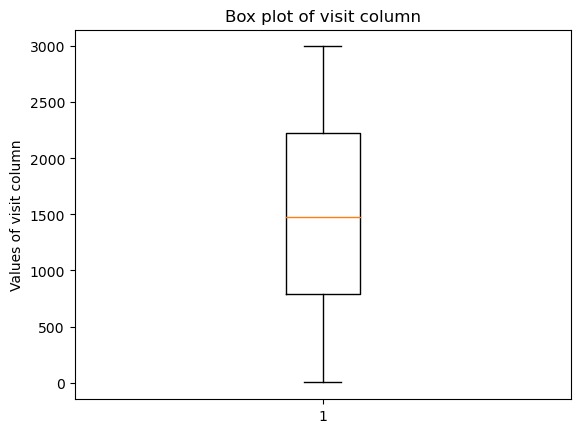

In [27]:

#Printing the shape of the dataframe.

import numpy as np

print("Total number of rows by using shape function of the dataframe\n",visitdata.shape)
print("Total number of rows by using shape function \
      of the dataframe which has only finite data\n",visitdata[np.isfinite(visitdata['visit'])].shape)

visitdatafinite= visitdata[np.isfinite(visitdata['visit'])]

#Plotting the box plot of finite data using matplotlib

import matplotlib.pyplot as plt

plt.boxplot(visitdatafinite['visit'])
plt.show
plt.title("Box plot of visit column")
plt.ylabel("Values of visit column")
plt.show()



From the above box plot, it is clearly evident that the 1st quartile is somewhere near 800, 2nd quartile near 1400 and 3rd quartile near 2200.  Usually, the values above the whiskers are considered as outliers and in this case the value of lower whisker is at 100 and upper whisker is at 2900.  Anydata beyond these values, we are considering as outliers and would be eliminating

In [28]:
#Getting rid of the outliers by subsetting, using the above values from boxplot inference,

visitdata_nooutliers=visitdatafinite[(visitdatafinite['visit']>=100) & (visitdatafinite['visit']<=2900)]
print("The shape of the dataframe after removing the outliers\n",visitdata_nooutliers.shape)

The shape of the dataframe after removing the outliers
 (923, 7)


# 3. Insert data into a SQL Lite database

In [29]:
#Importing the required libraries for sqlite

import sqlite3

#Creating the table and establishing the connection to execute the table creation 

query="create table info (Name VARCHAR(20), Address VARCHAR(40), City VARCHAR(20), State VARCHAR(20), Zip INTEGER, Phone Number INTEGER)"

con = sqlite3.connect("mydata.sqlite")

con.execute(query)



OperationalError: table info already exists

In [ ]:
#Inserting the data in the right format using executemany and committing,

data=[('Brad Bat','960 Riverview rd','RiverView','Alpharetta','65246','896 564 0352'),('Riaz','7200 Preston road','San Antonio','Texas','75236','458 796 0352'),('Biz','70 Preston st','Houston','Texas','94236','456 596 0352'),('Villz','5693 Houston st','Houston','Florida','56336','698 596 0352'),('Patty','Apt 1014 Brooks st','Kingsville','Georgia','45379','563 899 5692'),('Pondy','9654 Cathy dr','Irvine','CA','56984','563 986 0352'),('Zilly','666 Anderston dr','Madison','Georgia','56336','321 596 0352')]
con.executemany("INSERT INTO info VALUES(?, ?, ?, ?, ?, ?)", data)
con.commit()


In [30]:
#Reading the table by using sqlalchemy

import sqlalchemy as sqla
db = sqla.create_engine("sqlite:///mydata.sqlite")
pd.read_sql("SELECT * FROM info", db)

,Name,Address,City,State,Zip,Phone
0,Riaz,7200 Preston road,San Antonio,Texas,75236,458 796 0352
1,Biz,70 Preston st,Houston,Texas,94236,456 596 0352
2,Riaz,7200 Preston road,San Antonio,Texas,75236,458 796 0352
3,Biz,70 Preston st,Houston,Texas,94236,456 596 0352
4,Riaz,7200 Preston road,San Antonio,Texas,75236,458 796 0352
5,Biz,70 Preston st,Houston,Texas,94236,456 596 0352
6,Villz,5693 Houston st,Houston,Florida,56336,698 596 0352
7,Patty,Apt 1014 Brooks st,Kingsville,Georgia,45379,563 899 5692
8,Pondy,9654 Cathy dr,Irvine,CA,56984,563 986 0352
9,Zilly,666 Anderston dr,Madison,Georgia,56336,321 596 0352
